<a href="https://colab.research.google.com/github/terabitiya/Data-Literacy-Project/blob/main/Comparison_Rus_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tueplots

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tueplots

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Tuebingen/Data Literacy/Project/'
data_rus = pd.read_pickle(path+'data_rus.pkl')
data_ger = pd.read_pickle(path+'data_ger.pkl')
parties_rus=['CPRF', 'LDPR', 'New_People','UR', 'Just', 'other']
parties_ger=[ 'SPD', 'AfD', 'FDP', 'DIE LINKE', 'GRUNE','CDU_CSU']

In [6]:
voteshares_rus = data_rus.loc[:,parties_rus].apply(lambda x: x/data_rus['received']*100, axis=0)
voteshares_ger = data_ger.loc[:,parties_ger].apply(lambda x: x/data_ger['received']*100, axis=0)

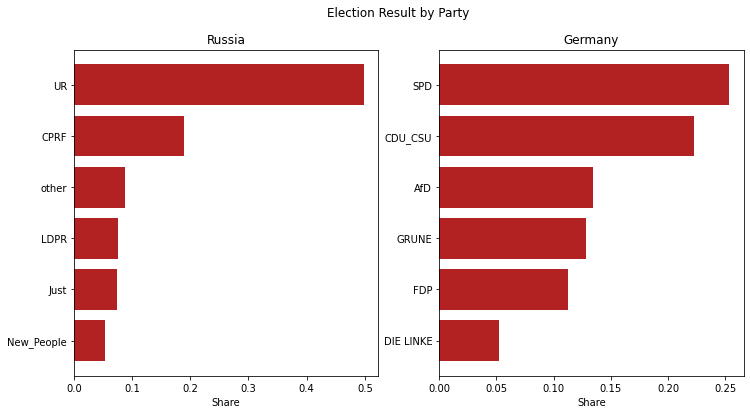

In [7]:
finres_rus=(pd.DataFrame(data_rus.loc[:,parties_rus].sum(axis=0)/sum(data_rus.received),columns=['Share'])
           .reset_index()
           .rename(columns={'index':'Party'})
           .sort_values(by='Share')
            )
finres_ger=(pd.DataFrame(data_ger.loc[:,parties_ger].sum(axis=0)/sum(data_ger.received),columns=['Share'])
           .reset_index()
           .rename(columns={'index':'Party'})
           .sort_values(by='Share')
            )

fig,axes = plt.subplots(1,2,figsize=(12,6))
axes[0].barh(finres_rus.Party,finres_rus.Share,color='firebrick')
axes[0].set(xlabel='Share')
axes[0].set_title('Russia')
axes[1].barh(finres_ger.Party,finres_ger.Share,color='firebrick')
axes[1].set(xlabel='Share')
axes[1].set_title('Germany')
fig.suptitle('Election Result by Party')
plt.show()

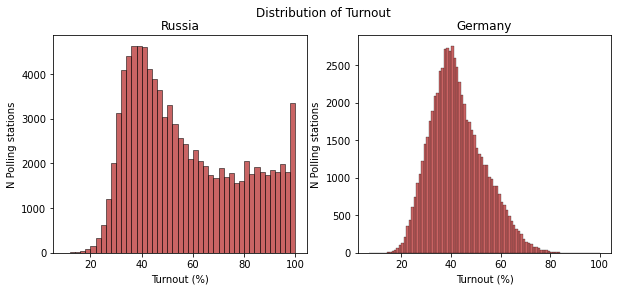

In [8]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

ax1=sns.histplot(ax=axes[0],data=data_rus['turnout']*100, binwidth=2, color = 'firebrick',alpha=0.7)
ax1.set(xlabel='Turnout (%)',ylabel='N Polling stations')
ax1.set_title('Russia')

ax2=sns.histplot(ax=axes[1],data=data_ger['turnout']*100, binwidth=1, color = 'firebrick',alpha=0.7)
ax2.set(xlabel='Turnout (%)',ylabel='N Polling stations')
ax2.set_title('Germany')

fig.suptitle('Distribution of Turnout')
plt.show()


In [20]:
from tueplots import bundles
plt.rcParams.update(bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2))
with plt.rc_context(bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)):
    pass

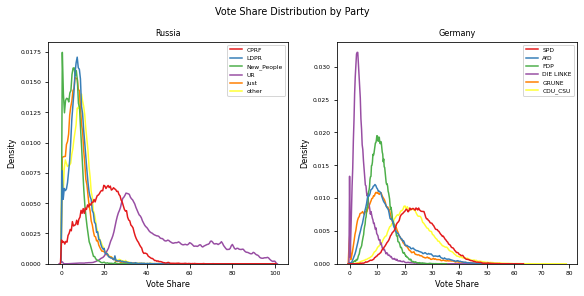

In [22]:
fig,axes = plt.subplots(1,2,figsize=(8,4))

ax1=sns.kdeplot(ax=axes[0],data=voteshares_rus, palette='Set1',linewidth=1.5, bw_adjust=.2)
ax1.set(xlabel='Vote Share')
ax1.set_title('Russia')

ax2=sns.kdeplot(ax=axes[1],data=voteshares_ger, palette='Set1',linewidth=1.5, bw_adjust=.2)
ax2.set(xlabel='Vote Share')
ax2.set_title('Germany')

fig.suptitle('Vote Share Distribution by Party')
plt.savefig(path+"Vote_Distr_Rus_Ger.pdf", format="pdf")
plt.show()


In [25]:
def get_bins(df):
    df['turnout_bins'] = pd.cut(df['turnout']*100, bins=np.arange(0,101,1), labels=False)
    df=df.groupby(by='turnout_bins').sum()
    return df

def plot_shpilkin(dfs,parties,countries=None,cum=False):
    fig,axes = plt.subplots(1,2,figsize=(8,4))
    for i in [0,1]:
        df = get_bins(dfs[i])
        for party in parties[i]:
            if cum:
                axes[i].plot(df.index,df[party].cumsum(),label=party)
            else: axes[i].plot(df.index,df[party],label=party)
            axes[i].set_title(countries[i])
            axes[i].set(xlabel='Turnout (%)',ylabel='Number of Votes in the Interval of 1% Turnout')
        axes[i].legend()
    plt.suptitle("Votes Distribution Depending on Turnout")
    plt.savefig(path+"Vote_Distr_VS_Turnout_Rus_Ger.pdf", format="pdf")
    plt.show()

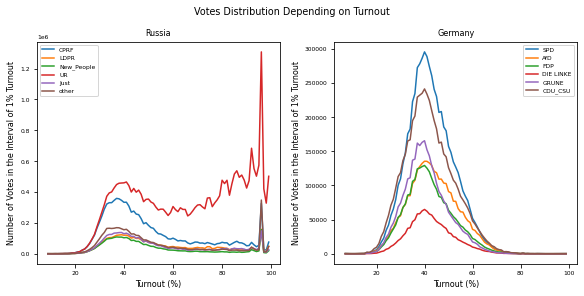

In [28]:
plot_shpilkin([data_rus,data_ger],
              [parties_rus,parties_ger],
              ['Russia','Germany'])

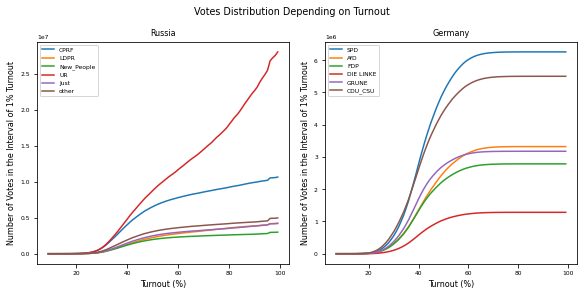

In [27]:
plot_shpilkin([data_rus,data_ger],
              [parties_rus,parties_ger],
              ['Russia','Germany'],
              cum=True)

In [35]:
def plot_comet(data, voteshares,parties, country):
    fig,axes = plt.subplots(2,3,figsize=(8,6))
    for i in range(2):
        for j in range(3):
            axes[i,j].scatter(data['turnout']*100,voteshares[parties[i+j]],s=.2,alpha=.5, edgecolor='none', color='#5e4fa2') 
            axes[i,j].set(xlabel='Turnout (%)', ylabel=parties[i+j]+' (%)')
            axes[i,j].set_title(parties[i+j])
    plt.suptitle(country)
    plt.savefig(path+"Comets_"+country+".pdf", format="pdf")
    plt.show()

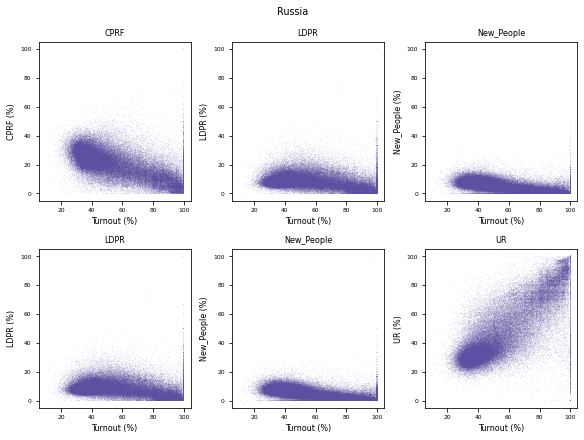

In [36]:
plot_comet(data_rus, voteshares_rus,parties_rus,'Russia')

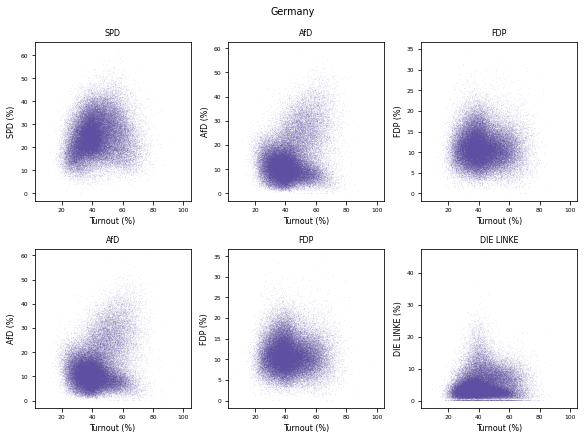

In [37]:
plot_comet(data_ger, voteshares_ger,parties_ger,'Germany')